In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [3]:
data = pd.read_csv(r"C:\Users\USER\Downloads\archive (9)\IMDB Dataset.csv")

In [40]:
train_data = data['review'][:40000]
test_data = data['review'][40000:]
train_labels = data['sentiment'][:40000].map({'positive': 1, 'negative': 0}).values
test_labels = data['sentiment'][40000:].map({'positive': 1, 'negative': 0}).values

In [41]:
# Print initial shapes
print(f"Initial train_data shape: {train_data.shape}")
print(f"Initial test_data shape: {test_data.shape}")
print(f"Initial train_labels shape: {train_labels.shape}")
print(f"Initial test_labels shape: {test_labels.shape}")

Initial train_data shape: (40000,)
Initial test_data shape: (10000,)
Initial train_labels shape: (40000,)
Initial test_labels shape: (10000,)


In [42]:
voc_size=10000

In [44]:
#Tokenization

tokenizer = Tokenizer(num_words=voc_size)
tokenizer.fit_on_texts(train_data)

In [45]:
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

In [46]:
train_sequences = [[min(word, voc_size - 1) for word in sequence] for sequence in train_sequences]
test_sequences = [[min(word, voc_size - 1) for word in sequence] for sequence in test_sequences]

In [48]:
# Pad the sequences
sent_length = 100
train_padded_sequences = pad_sequences(train_sequences, maxlen=sent_length)
test_padded_sequences = pad_sequences(test_sequences, maxlen=sent_length)
# Print shapes to verify
print(f"Train padded sequences shape: {train_padded_sequences.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test padded sequences shape: {test_padded_sequences.shape}")
print(f"Test labels shape: {test_labels.shape}")


Train padded sequences shape: (40000, 100)
Train labels shape: (40000,)
Test padded sequences shape: (10000, 100)
Test labels shape: (10000,)


In [49]:
#Ensure the shapes match
assert train_padded_sequences.shape[0] == train_labels.shape[0], "Train sequences and labels size mismatch"
assert test_padded_sequences.shape[0] == test_labels.shape[0], "Test sequences and labels size mismatch"

In [50]:
dim = 128

In [51]:
model = Sequential()

In [52]:
model.add(Embedding(input_dim=voc_size, output_dim=128,input_shape=(sent_length,)))

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

In [54]:
model.add(Dense(1, activation='sigmoid'))

In [55]:
from tensorflow.keras.optimizers import Adam 

In [56]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,411,713 (5.39 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
history = model.fit(train_padded_sequences,train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 127s 122ms/step - accuracy: 0.7307 - loss: 0.5196 - val_accuracy: 0.8295 - val_loss: 0.4064
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 136s 116ms/step - accuracy: 0.8700 - loss: 0.3117 - val_accuracy: 0.8424 - val_loss: 0.3910
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 116s 116ms/step - accuracy: 0.9008 - loss: 0.2487 - val_accuracy: 0.8555 - val_loss: 0.3550
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 119s 119ms/step - accuracy: 0.9314 - loss: 0.1809 - val_accuracy: 0.8560 - val_loss: 0.3805
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 119s 119ms/step - accuracy: 0.9488 - loss: 0.1418 - val_accuracy: 0.8554 - val_loss: 0.3913
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 181s 158ms/step - accuracy: 0.9612 - loss: 0.1114 - val_accuracy: 0.8571 - val_loss: 0.4640
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 122s 122ms/step - accuracy: 0.9699 - loss: 0.0868 - val_accuracy: 0.8521 - val_loss: 0.5240
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 122s 122ms/step - ac

In [60]:
import matplotlib.pyplot  as plt

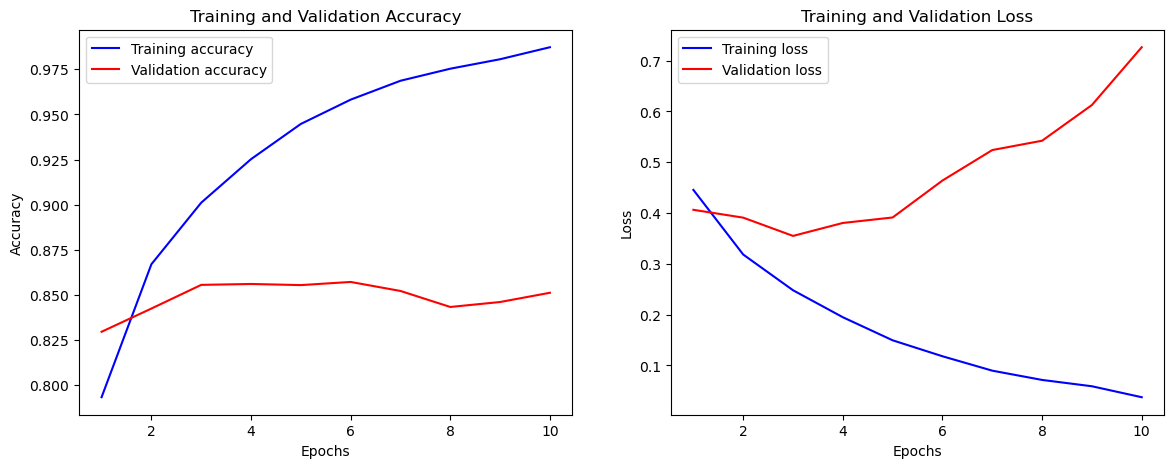

In [61]:
def plot_model_performance(history):
    # Extracting accuracy and loss from the history object
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(accuracy) + 1)

    # Plot accuracy
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the model performance
plot_model_performance(history)


In [62]:
test_predictions = model.predict(test_padded_sequences)
print(test_predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step
[[1.50005526e-05]
 [1.21228896e-01]
 [6.20950460e-01]
 ...
 [8.60796571e-01]
 [9.84160602e-01]
 [6.96916904e-05]]


In [63]:
test_loss,test_accuracy = model.evaluate(test_padded_sequences,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8506 - loss: 0.7266
